## Big mart sales prediction

In [106]:
import pandas as pd
import numpy as np

### Train data

In [107]:
df=pd.read_csv('train_v9rqX0R.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [108]:
df.shape

(8523, 12)

### Test data

In [109]:
test_data=pd.read_csv('test_AbJTz2l.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [110]:
#Concate the test and train data
df=pd.concat([df,test_data],axis=0)
df.reset_index(drop=True,inplace=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Missing values

In [111]:
df_null=pd.DataFrame({'Missing_values':df.isnull().sum(),'Percentage of missing':(df.isnull().sum()/df.shape[0])})
df_null

,Missing_values,Percentage of missing
Item_Identifier,0,0.000000
Item_Weight,2439,0.171712
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Size,4016,0.282737
Outlet_Location_Type,0,0.000000


In [112]:
#drop the item_identifier
df.drop(labels=['Item_Identifier'],axis=1,inplace=True)

In [113]:
#Categorical data
cat_data=[c for c in df.columns if df[c].dtype == 'O']
cate=df[cat_data]
cate.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [114]:
#numerical data
num_data=[n for n in df.columns if df[n].dtype !='O']
num=df[num_data]
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


### Categorical data plot

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
def cat_plot(variable,data):
    plt.figure(figsize=(8,6))
    sns.countplot(x=i,data=cate)
    plt.title(variable,fontsize=19)
    plt.xlabel(variable,fontsize=17)
    plt.ylabel('Count',fontsize=17)
    plt.show()

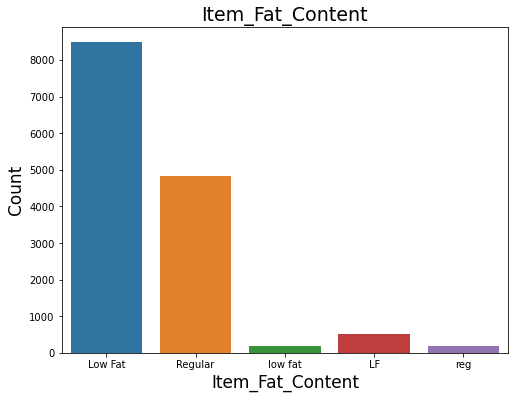

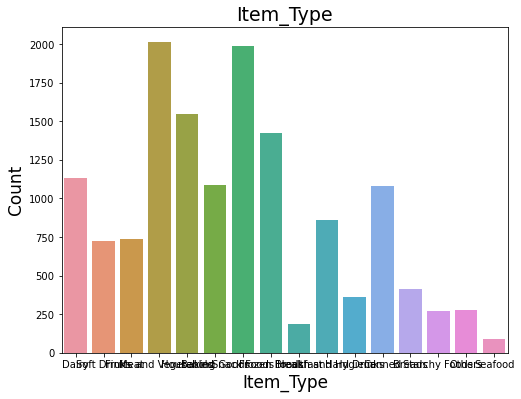

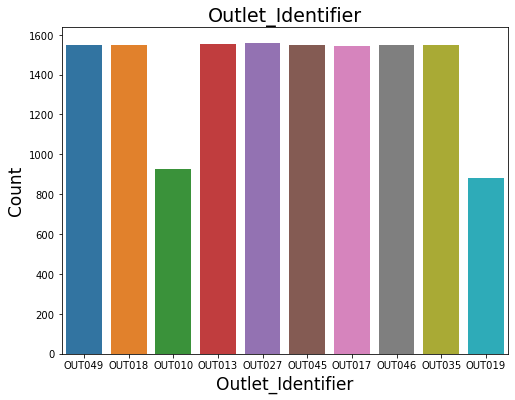

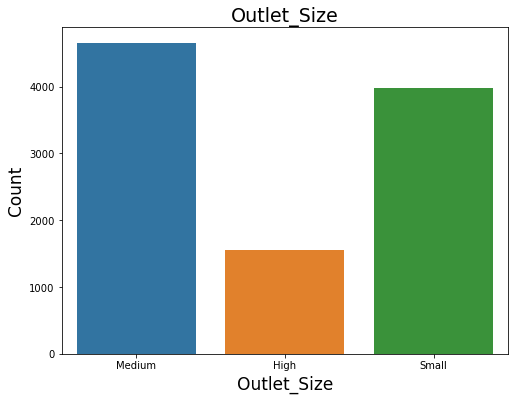

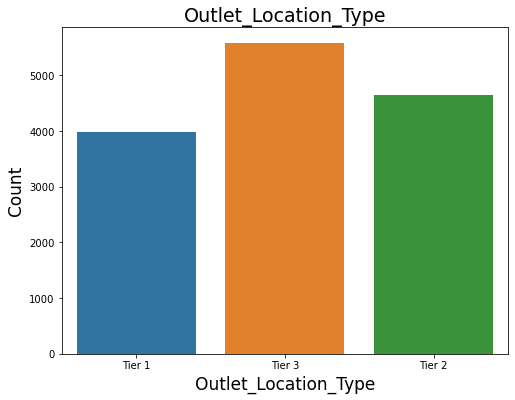

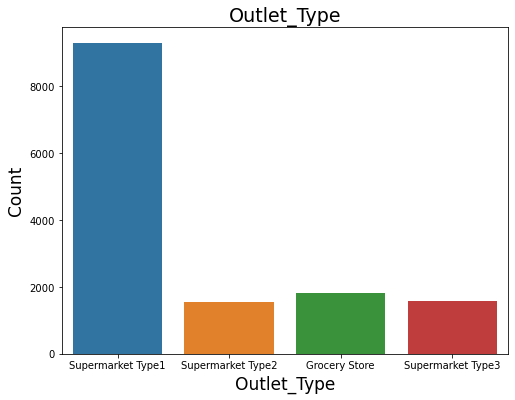

In [117]:
for i in cate.columns:
    cat_plot(i,cate)

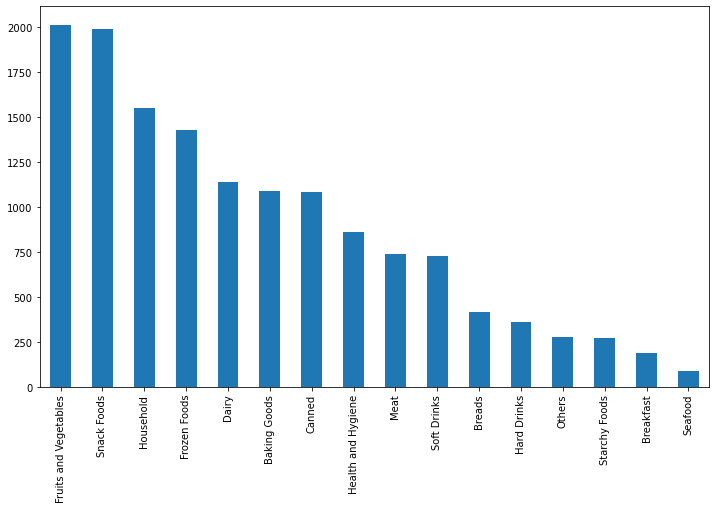

In [118]:
plt.figure(figsize=(12,7))
df['Item_Type'].value_counts().plot.bar()

### Numerical data plot

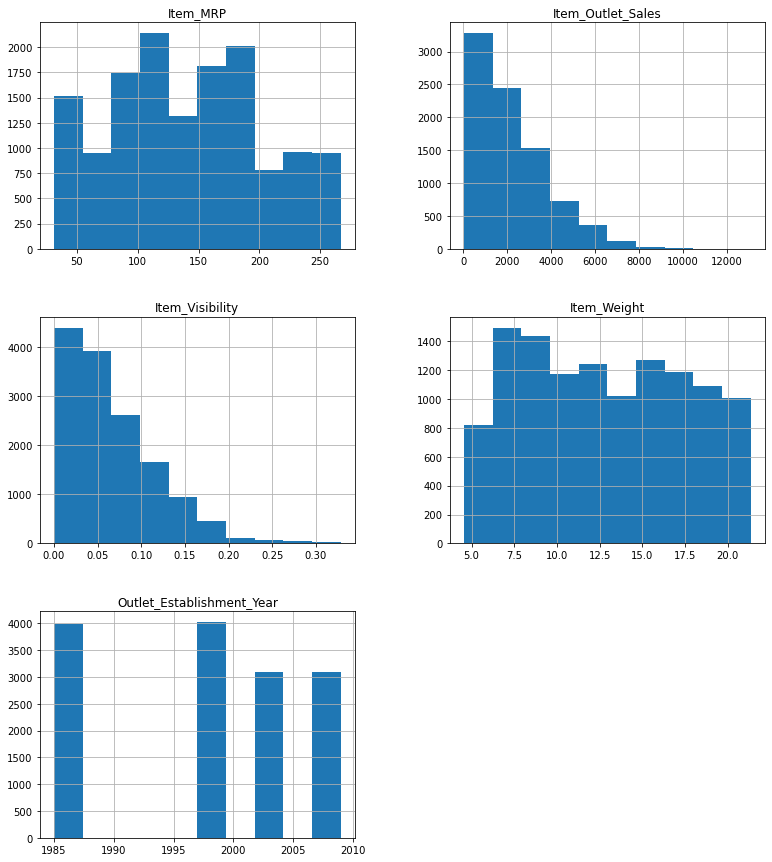

In [119]:
num.hist(figsize=(13,15))
plt.show()

### Correlation

In [120]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


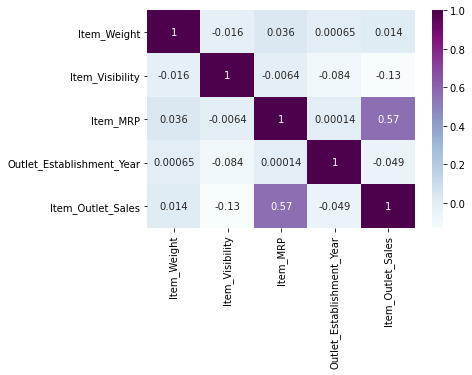

In [121]:
sns.heatmap(df.corr(),annot=True,cmap='BuPu')

### Feature engineering

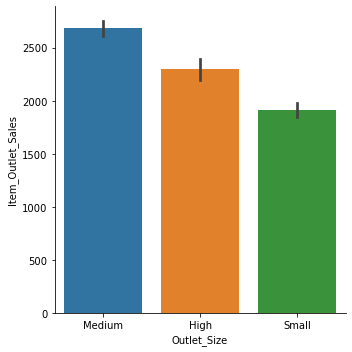

In [122]:
sns.catplot(x='Outlet_Size',y='Item_Outlet_Sales',kind='bar',data=df)

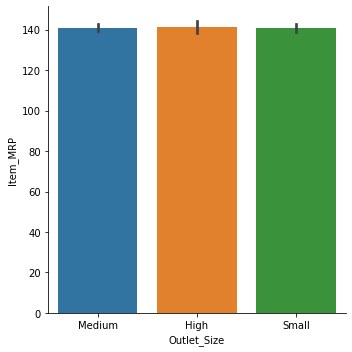

In [123]:
sns.catplot(x='Outlet_Size',y='Item_MRP',kind='bar',data=df)

In [124]:
print('Mean:',df['Item_Weight'].mean())
print('Median:',df['Item_Weight'].median())
print('Mode:',df['Item_Weight'].mode()[0])
print('Std:',df['Item_Weight'].std())

Mean: 12.792854228644991
Median: 12.6
Mode: 17.6
Std: 4.652502286412856


In [125]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=3)
df['Item_Weight']=knn.fit_transform(df[['Item_Weight']])

In [126]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [127]:
def item_fat(text):
    if 'LF' in text.lower():
        return 'Low Fat'
    if 'low fat' in text.lower():
        return 'Low Fat'
    if 'reg' in text.lower():
        return 'Regular'
    else:
        return text

In [128]:
df['Item_Fat_Content']=df['Item_Fat_Content'].apply(item_fat)

In [129]:
df['Item_Fat_Content'].value_counts()

Low Fat    8663
Regular    5019
LF          522
Name: Item_Fat_Content, dtype: int64

In [130]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')

In [131]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [132]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [133]:
df['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [134]:
df['Outlet_Identifier']=df['Outlet_Identifier'].apply(lambda x:x[-2:])

In [135]:
df['Outlet_Identifier'].value_counts()

27    1559
13    1553
35    1550
49    1550
46    1550
45    1548
18    1546
17    1543
10     925
19     880
Name: Outlet_Identifier, dtype: int64

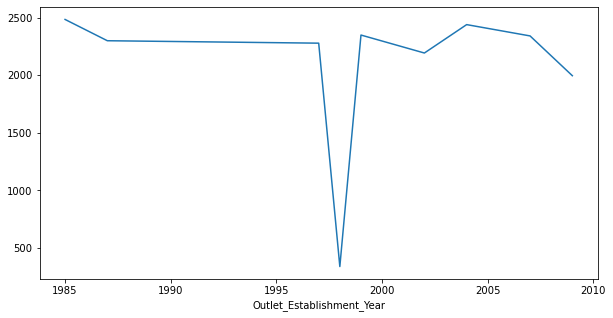

In [136]:
df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot(figsize=(10,5))

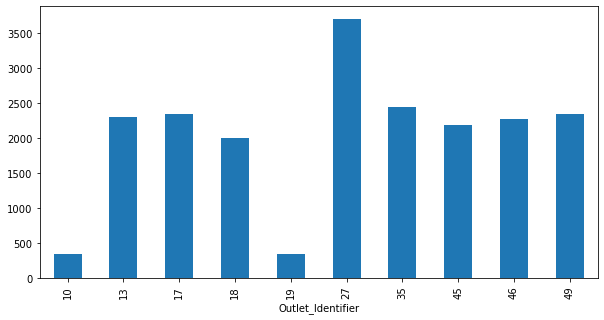

In [137]:
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().plot.bar(figsize=(10,5))

### Encoding the categorical data in to numerical data

In [140]:
df_new=df.copy()
df_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,13,1987,High,Tier 3,Supermarket Type1,994.7052


In [142]:
item_fat=pd.get_dummies(df_new['Item_Fat_Content'],drop_first=True)

In [143]:
outlet={'Small':1,'Medium':2,'High':3}
df_new['Outlet_Size']=df_new['Outlet_Size'].map(outlet)

In [144]:
df_new['Outlet_Location_Type']=df_new['Outlet_Location_Type'].apply(lambda x: x.split()[1])

In [145]:
df_new['Outlet_Location_Type'].value_counts()

3    5583
2    4641
1    3980
Name: Outlet_Location_Type, dtype: int64

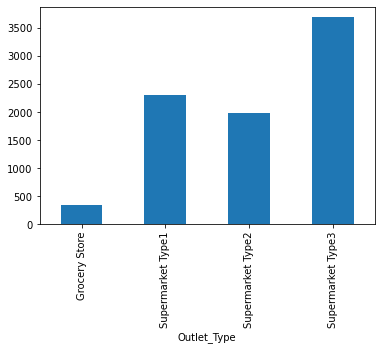

In [146]:
df_new.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()

In [147]:
market=pd.get_dummies(df_new['Outlet_Type'],drop_first=True)

In [148]:
df_1=pd.concat([df_new,item_fat],axis=1)
df_1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Regular
0,9.30,Low Fat,0.016047,Dairy,249.8092,49,1999,2,1,Supermarket Type1,3735.1380,0
1,5.92,Regular,0.019278,Soft Drinks,48.2692,18,2009,2,3,Supermarket Type2,443.4228,1
2,17.50,Low Fat,0.016760,Meat,141.6180,49,1999,2,1,Supermarket Type1,2097.2700,0
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,1998,2,3,Grocery Store,732.3800,1
4,8.93,Low Fat,0.000000,Household,53.8614,13,1987,3,3,Supermarket Type1,994.7052,0


In [149]:
df_1.drop(columns=['Item_Fat_Content'],axis=1,inplace=True)

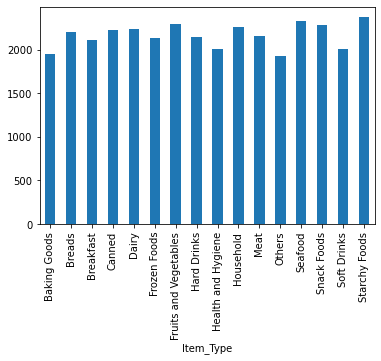

In [150]:
df_1.groupby('Item_Type')['Item_Outlet_Sales'].mean().plot.bar()

In [151]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df_1['Item_Type']=lc.fit_transform(df_1['Item_Type'])
df_1['Outlet_Type']=lc.fit_transform(df_1['Outlet_Type'])

In [48]:
df_1.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'Regular'],
      dtype='object')

In [153]:
#### Rearrange the columns
df_2=df_1[['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Regular','Item_Outlet_Sales']]

df_2.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Regular,Item_Outlet_Sales
0,9.30,0.016047,4,249.8092,49,1999,2,1,1,0,3735.1380
1,5.92,0.019278,14,48.2692,18,2009,2,3,2,1,443.4228
2,17.50,0.016760,10,141.6180,49,1999,2,1,1,0,2097.2700
3,19.20,0.000000,6,182.0950,10,1998,2,3,0,1,732.3800
4,8.93,0.000000,9,53.8614,13,1987,3,3,1,0,994.7052


### Feature transformations

In [156]:
from scipy import stats

In [157]:
df_2['Item_Outlet_Sales']=np.log(df_2['Item_Outlet_Sales'])

In [158]:
df_2['Outlet_Location_Type']=df_2['Outlet_Location_Type'].astype(int)
df_2['Outlet_Identifier']=df_2['Outlet_Identifier'].astype(int)

In [237]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [238]:
x.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int32
Outlet_Type                    int32
Regular                        uint8
dtype: object

In [160]:
df_3=df_2.iloc[8523:,:]
df_3.reset_index(inplace=True,drop=True)
df_3.shape

(5681, 11)

In [163]:
df_4=df_2.iloc[:8523,:]
df_4.reset_index(drop=True,inplace=True)
df_4.shape

(8523, 11)

In [164]:
df_4.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Regular,Item_Outlet_Sales
0,9.30,0.016047,4,249.8092,49,1999,2,1,1,0,8.225540
1,5.92,0.019278,14,48.2692,18,2009,2,3,2,1,6.094524
2,17.50,0.016760,10,141.6180,49,1999,2,1,1,0,7.648392
3,19.20,0.000000,6,182.0950,10,1998,2,3,0,1,6.596300
4,8.93,0.000000,9,53.8614,13,1987,3,3,1,0,6.902446


### Model building

In [165]:
x=df_4.drop('Item_Outlet_Sales',1)
y=df_4['Item_Outlet_Sales']

In [166]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

##### Linear regression

In [167]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [168]:
print('Train_score: ',reg.score(x_train,y_train))
print('Test_score: ',reg.score(x_test,y_test))

Train_score:  0.6064298284771414
Test_score:  0.5932734984369161


In [169]:
reg_pred=reg.predict(x_test)

In [170]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE: ',mean_absolute_error(y_test,reg_pred))
print('MASE: ',mean_squared_error(y_test,reg_pred))
print('R2: ',r2_score(y_test,reg_pred))

MAE:  0.522380485574281
MASE:  0.4345518903224214
R2:  0.5932734984369161


##### RandomForestRegressor

In [171]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [172]:
print('Train_score: ',rf.score(x_train,y_train))
print('Test_score: ',rf.score(x_test,y_test))

Train_score:  0.9596605863925044
Test_score:  0.6992753263471547


In [173]:
rf_pred=rf.predict(x_test)

In [174]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print('MAE: ',mean_absolute_error(y_test,rf_pred))
print('MASE: ',mean_squared_error(y_test,rf_pred))
print('R2: ',r2_score(y_test,rf_pred))

MAE:  0.4457512338586664
MASE:  0.32129815711595194
R2:  0.6992753263471547


##### XGBRegressor

In [175]:
import xgboost
xgb=xgboost.XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [176]:
print('Train_score: ',xgb.score(x_train,y_train))
print('Test_score: ',xgb.score(x_test,y_test))

Train_score:  0.893318585766962
Test_score:  0.690636909733003


##### Lightgbm

In [177]:
import lightgbm
light=lightgbm.LGBMRegressor()
light.fit(x_train,y_train)

LGBMRegressor()

In [178]:
print('Train_score: ',light.score(x_train,y_train))
print('Test_score: ',light.score(x_test,y_test))

Train_score:  0.8075115243409126
Test_score:  0.7199805008643442


##### KneighbourRegressor

In [179]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [180]:
print('Train_score: ',knn.score(x_train,y_train))
print('Test_score: ',knn.score(x_test,y_test))

Train_score:  0.7722803552584143
Test_score:  0.7032188075635886


##### Lasso and Ridge

In [255]:
from sklearn.linear_model import Lasso
ls=Lasso()
param={'alpha':[0.1,0.2,0.3,0.01,0.02,0.03]}
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
las_hyp=RandomizedSearchCV(ls,param_distributions=param,cv=10,verbose=3,scoring='neg_mean_squared_error',n_jobs=-1,n_iter=10)
las_hyp.fit(x_train,y_train)

C:\Users\Praneeth\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   13.9s finished


RandomizedSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.2, 0.3, 0.01, 0.02,
                                                  0.03]},
                   scoring='neg_mean_squared_error', verbose=3)

In [258]:
las_hyp=las_hyp.best_estimator_
las_hyp.fit(x_train,y_train)

Lasso(alpha=0.01)

In [259]:
las_hyp.score(x_train,y_train)

0.600523628211911

In [260]:
las_hyp.score(x_test,y_test)

0.5863447187500763

In [262]:

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

classifier=xgboost.XGBRegressor()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=50,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)

random_search.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.0min finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validate

In [263]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [264]:
xgb_hyp=random_search.best_estimator_
xgb_hyp.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [265]:
xgb_hyp.score(x_train,y_train)

0.7476984974053371

In [266]:
xgb_hyp.score(x_test,y_test)

0.729899399427018

In [267]:
xgb_pred=xgb_hyp.predict(x_test)

In [268]:
print('MAE: ',mean_absolute_error(y_test,xgb_pred))
print('MASE: ',mean_squared_error(y_test,xgb_pred))
print('R2: ',r2_score(y_test,xgb_pred))

MAE:  0.4181860485831762
MASE:  0.2885789986763525
R2:  0.729899399427018


### Test data

In [ ]:
test_data=pd.read_csv('')